In [49]:
#d1=read.table("student-mat.csv",sep=";",header=TRUE)
#d2=read.table("student-por.csv",sep=";",header=TRUE)

#d3=merge(d1,d2,by=c("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"))
#print(nrow(d3)) # 382 students

In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression  # for random and balanced train test split
# Split data in Training and testing 
#from sklearn.model_selection import train_test_split
from math import sqrt

In [52]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [53]:
df = pd.read_csv("student-por.csv",sep=";")

In [54]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [55]:
df.shape

(649, 33)

In [56]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [57]:
data = df[["G1", "G2", "absences","failures", "studytime","G3"]]
print(data)

     G1  G2  absences  failures  studytime  G3
0     0  11         4         0          2  11
1     9  11         2         0          2  11
2    12  13         6         0          2  12
3    14  14         0         0          3  14
4    11  13         0         0          2  13
..   ..  ..       ...       ...        ...  ..
644  10  11         4         1          3  10
645  15  15         4         0          2  16
646  11  12         6         0          2   9
647  10  10         6         0          1  10
648  10  11         4         0          1  11

[649 rows x 6 columns]


In [58]:
data.dtypes

G1           int64
G2           int64
absences     int64
failures     int64
studytime    int64
G3           int64
dtype: object

In [59]:
X = np.array(data.drop(['G3'], 1))
Y =np.array(data['G3'])
print(Y)

[11 11 12 14 13 13 13 13 17 13 14 13 12 13 15 17 14 14  7 12 14 12 14 10
 10 12 12 11 13 12 11 15 15 12 12 11 14 13 12 12 10 11 15 10 11 11 13 17
 13 12 13 16  9 12 13 12 15 16 14 16 16 16 10 13 12 16 12 10 11 15 11 10
 11 14 11 11 11 13 10 11 12  9 11 13 12 12 11 15 11 10 11 13 12 14 12 13
 11 12 13 13  8 16 12 10 16 10 10 14 11 14 14 11 10 18 10 14 16 15 11 14
 14 13 13 13 11  9 11 11 15 13 12  8 11 13 12 14 11 11 11 15 10 13 12 11
 11 10 10 14  9 11  9 13 11 13 11  6 12 10 11 13 11  8 11  0 10 13 11 13
  8 10 11 11  1 10  9  8 10  8  8  8 11 18 13 17 10 18 10 13 15 11 14 10
 11 13 11 13 17 14 16 14 11 16 14 10 13 12 12 10 12 16 14 12 16 11 15 12
 15 13 13  8 12 15 13 12 12 12 13 11 11 15 10 10 13 13 11 12 14 10 16  8
 17 11 11 16 12 13 13 14  9 12 16 10 13 10 10  7  8  9 15 10 11 13  8  8
 10 15 14 15 12 15 15 12 15 11 10 11 16 11 13  5 10 11  7 10  6 12 13 10
 13 17 11 11 14 14 13 14 16 10 12 12 15 11 12 13 13  9 16 14 12 14 10 12
 16 13 18 15 16 12 10 12 13 15 10 10 11 10 13 18 13

In [60]:
train_count = int(data.shape[0] * 0.7)
test_count = data.shape[0] - train_count
train_count,test_count

(454, 195)

In [61]:
Y_train = data.iloc[:train_count,0]
Y_test = data.iloc[train_count:,0]
Y_train.shape, Y_test.shape


((454,), (195,))

In [62]:
X_train = data.iloc[:train_count,1:]          #[0,2,3,4]]
X_test = data.iloc[train_count:,1:]           #[0,2,3,4]]
X_train.shape, X_test.shape


((454, 5), (195, 5))

In [63]:
X_train.head()

,G2,absences,failures,studytime,G3
0,11,4,0,2,11
1,11,2,0,2,11
2,13,6,0,2,12
3,14,0,0,3,14
4,13,0,0,2,13


In [64]:
reg = LinearRegression().fit(X_train, Y_train)

In [65]:
reg.coef_, reg.intercept_

(array([ 0.74706496, -0.00721513, -0.11038876,  0.10277013,  0.08013414]),
 1.7130949327556273)

In [66]:
Y_pred = reg.predict(X_test)
#print(Y_pred)
print(Y_test.values)

[ 9  9 13 10 13 10 11 13 13 14 11  9 10 14 13 13 13 12 14 10 10 12 10 12
  7  9  9  9  9  9  7 11  9  7  7  8  9  7  8  9  8 14 14 10 14 17  6 14
 10 14 12 11 11 11 10 16 15 11  7  8  7  9 14 14  8  8  6  8  8  5  7 15
 13 10  9 11  7 10  9 14 11  9 13 12 11  9  9 11 10  9 12  8 13 10 11 17
 12 13  9 11 10 13  9  7  8 12 10 10 11  7 11 10  9  4  6  4  7  8  5  7
  8 10  9 10  8  9  8  6  6  8 10  8  8  7  8  7  7 12 11 12 18 17 17  9
 10 12 12  8 11  5  9  5 18 11  8 11  8 14 10 10 12 15 14 19 16 13 15 13
  8 15  8 10  7  9 10  7 15 10  7 13 16  8 17  7 14  5  7 14  6  7 10 15
 11 10 10]


In [67]:
rmse_metric(Y_test.values,Y_pred)

1.607175453469589

# Plot Predicted and actual values

In [68]:
res = pd.DataFrame([Y_pred,Y_test])
res = res.T
res.columns = ['Y_pred','Y_test']

In [69]:
res.head()

,Y_pred,Y_test
0,8.506964,9.0
1,10.110492,9.0
2,13.579557,13.0
3,10.886195,10.0
4,10.636569,13.0


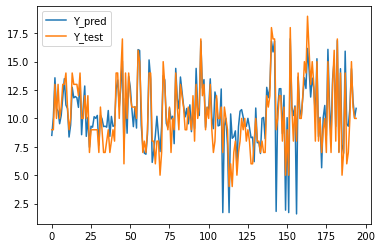

In [70]:
res[['Y_pred', 'Y_test']].plot()

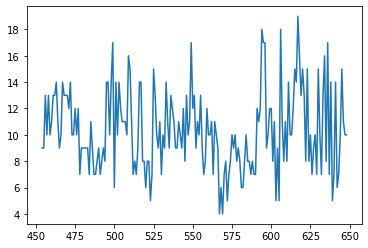

In [71]:
Y_test.plot()

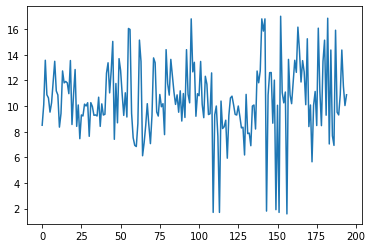

In [72]:
pd.Series(Y_pred).plot()